<a href="https://colab.research.google.com/github/AadiptyaBasuli/Breast_Cancer_detection_usingCNN_ultrasound_images/blob/main/Breast_Cancer_Detection_in_Ultrasound_images_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Importing libraries

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import matplotlib.pyplot as plt
from PIL import Image
import os
import pathlib
import random

Defining the path

In [4]:
path = '/content/drive/MyDrive/Dataset_BUSI_with_GT'
data_dir = pathlib.Path(path)

Getting class names

In [5]:
class_names = np.array([item.name for item in data_dir.glob("*")])
class_names

array(['benign', 'malignant', 'normal'], dtype='<U9')

Define paths and image count

In [6]:
benignPath = pathlib.Path(os.path.join(data_dir,'benign'))
normalPath = pathlib.Path(os.path.join(data_dir,'normal'))
malignantPath = pathlib.Path(os.path.join(data_dir,'malignant'))

Image Count

In [7]:
benignImageCount = len(list(benignPath.glob('*.png')))
malignantImageCount = len(list(malignantPath.glob('*.png')))
normalImageCount = len(list(normalPath.glob('*.png')))
totalImageCount = benignImageCount + malignantImageCount + normalImageCount

In [8]:
print("Total number of Images: ", totalImageCount)
print("No. of Benign (non-dangerous) Images: {}({})".format(benignImageCount, round(benignImageCount*100/totalImageCount, 2)))
print("No. of Malignant (dangerous) Images: {}({})".format(malignantImageCount, round(malignantImageCount*100/totalImageCount, 2)))
print("No. of Normal (No Traces) Images: {}({})".format(normalImageCount, round(normalImageCount*100/totalImageCount, 2)))


Total number of Images:  1573
No. of Benign (non-dangerous) Images: 888(56.45)
No. of Malignant (dangerous) Images: 419(26.64)
No. of Normal (No Traces) Images: 266(16.91)


CNN Building

In [9]:
batch_size = 32
img_height = 224
img_width = 224

Separating data sets

In [12]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

val_data = image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=123,image_size=(img_height,img_width),batch_size=batch_size)

#test_data = image_dataset_from_directory(data_dir,validation_split=0.2,subset="Testing",seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 1573 files belonging to 3 classes.
Using 1259 files for training.
Found 1573 files belonging to 3 classes.
Using 314 files for validation.


Defining the Model

In [13]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation="softmax")
])


Compiling the Model

In [16]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

epochs = 50
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data,
                    batch_size=batch_size)

Epoch 1/50
40/40 [==============================] - 46s 1s/step - loss: 0.4544 - accuracy: 0.8189 - val_loss: 0.6416 - val_accuracy: 0.7261
Epoch 2/50
40/40 [==============================] - 44s 1s/step - loss: 0.2695 - accuracy: 0.9071 - val_loss: 0.7143 - val_accuracy: 0.7325
Epoch 3/50
40/40 [==============================] - 45s 1s/step - loss: 0.1773 - accuracy: 0.9365 - val_loss: 0.7592 - val_accuracy: 0.7611
Epoch 4/50
40/40 [==============================] - 46s 1s/step - loss: 0.1018 - accuracy: 0.9666 - val_loss: 1.0062 - val_accuracy: 0.7357
Epoch 5/50
40/40 [==============================] - 45s 1s/step - loss: 0.0942 - accuracy: 0.9690 - val_loss: 0.9629 - val_accuracy: 0.7389
Epoch 6/50
40/40 [==============================] - 45s 1s/step - loss: 0.0723 - accuracy: 0.9793 - val_loss: 0.8615 - val_accuracy: 0.7357
Epoch 7/50
40/40 [==============================] - 45s 1s/step - loss: 0.0645 - accuracy: 0.9825 - val_loss: 0.9762 - val_accuracy: 0.7580
Epoch 8/50
40/40 [==

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Accuracy vs Lost graphs

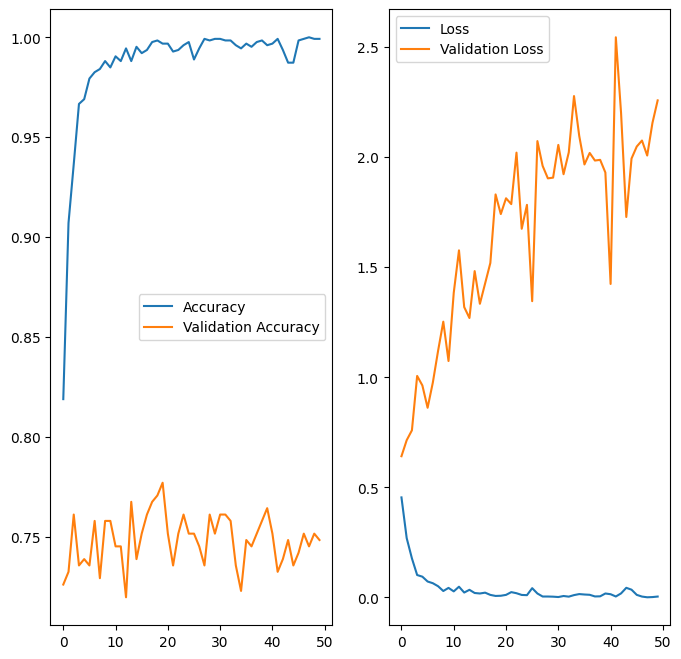

In [19]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()


Evaluating - It returns the lost and accuracy

In [23]:
model.evaluate(val_data)

10/10 [==============================] - 5s 258ms/step - loss: 2.2580 - accuracy: 0.7484


[2.2579681873321533, 0.7484076619148254]

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

Predictions : Testing the model

1/1 [==============================] - 0s 22ms/step


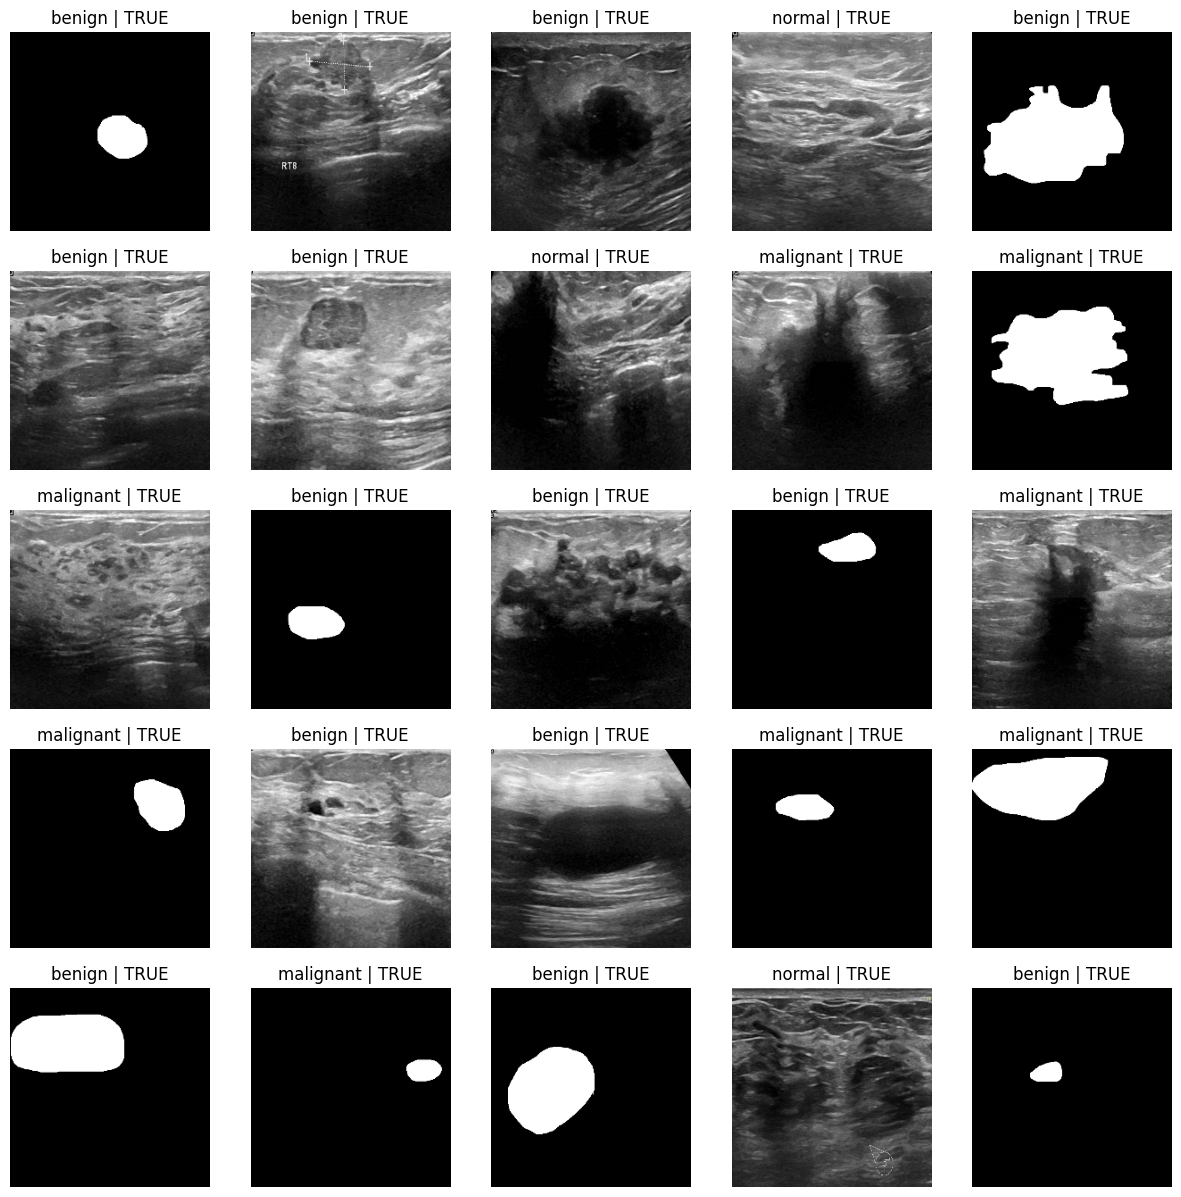

In [25]:
plt.figure(figsize=(15, 15))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):

        ax = plt.subplot(5, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)

        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'

        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result)
        plt.axis("off")

In [26]:
!pip install numpy matplotlib seaborn scikit-learn

Confusion Matrix

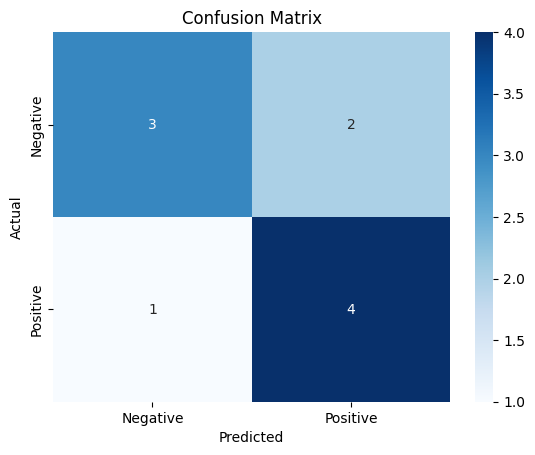

Accuracy: 0.7


In [27]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])

y_pred = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

conf_matrix = confusion_matrix(y_true, y_pred)

labels = ['Negative', 'Positive']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")


In [28]:
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]

y_pred = [1, 0, 1, 1, 0, 0, 1, 0, 1, 1]

conf_matrix = confusion_matrix(y_true, y_pred)

TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")


True Positives (TP): 4
True Negatives (TN): 3
False Positives (FP): 2
False Negatives (FN): 1


In [29]:
!pip install scikit-learn

In [30]:
from sklearn.metrics import f1_score
import numpy as np

y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])

y_pred = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

f1 = f1_score(y_true, y_pred)

print(f"F1 Score: {f1}")


F1 Score: 0.7272727272727272
